In [2]:
# Imports
# (1) pandas for reading the file
# (2) matplotlib for plotting
# (3) numpy for numerical python: Mathematical functions, arrays

import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axis3d
import numpy as np

wdf = pd.read_csv("data-files/WeatherDataMultiple.csv")
display(wdf.head())
display(wdf.info())

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       50 non-null     float64
 1   Wind Speed (km/h)     50 non-null     float64
 2   Pressure (millibars)  50 non-null     float64
 3   Humidity              50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


None

In [3]:
# Renaming the columns
wdf.rename(columns={'Temperature (C)':'temp', 'Wind Speed (km/h)': 'ws', \
                    'Pressure (millibars)': 'pressure', 'Humidity':'Humidity'}, inplace=True)
wdf.head()

,temp,ws,pressure,Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

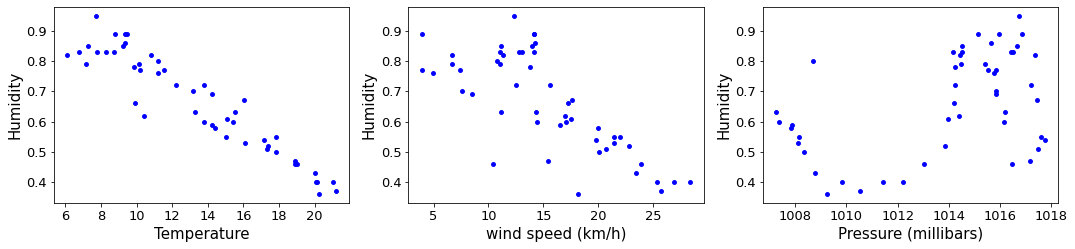

In [4]:
# Data visualization: 
    # Check if Linear regression is applicable --> By plotting it

# Plotting 
boxsize = 18
f       = plt.figure(figsize=(boxsize, 0.20*boxsize)) 

pt1 = plt.subplot(131) # (121) -> row, column, fig number
plt.scatter(wdf.temp, wdf.Humidity, s = 15, c = "blue") # scatter Plot --> dots/points
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

pt2 = plt.subplot(132) # (121) -> row, column, fig number
plt.scatter(wdf.ws, wdf.Humidity, s = 15, c = "blue") # scatter Plot --> dots/points
plt.xlabel("wind speed (km/h)", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

pt2 = plt.subplot(133) # (121) -> row, column, fig number
plt.scatter(wdf.pressure, wdf.Humidity, s = 15, c = "blue") # scatter Plot --> dots/points
plt.xlabel("Pressure (millibars)", fontsize=15)
plt.ylabel("Humidity", fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)


# Pressure is not suitable for linear regression: we will drop it

In [5]:
# Drop the pressure column
    # (0) --> row, and (1) --> column
    
wdf.drop(columns = ['pressure'], axis = 1, inplace=True)
wdf.head()

# Other option for dropping a column
# wdf.drop(['pressure'], axis = 1, inplace=True)
# wdf.pop('pressure')
# wdf.head()

,temp,ws,Humidity
0,9.472222,14.1197,0.89
1,9.355556,14.2646,0.86
2,9.377778,3.9284,0.89
3,8.288889,14.1036,0.83
4,8.755556,11.0446,0.83


Text(0.5, 0, 'Humidity')

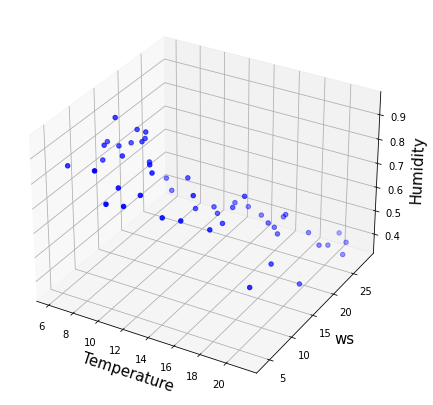

In [6]:
# Data visualization in 3-d: 

boxsize = 18
fig     = plt.figure(figsize=(boxsize, 0.40*boxsize)) 

p1  = fig.add_subplot(111, projection = "3d")

f1 = wdf.temp
f2 = wdf.ws
y  = wdf.Humidity

p1.scatter(f1, f2, y, c = "blue", s = 20, marker = "o")
p1.set_xlabel("Temperature", fontsize=15)
p1.set_ylabel("ws", fontsize=15)
p1.set_zlabel("Humidity", fontsize=15)

In [8]:
from sklearn.linear_model import LinearRegression

# Prepare data to input as an argument in LinReg model (2d-array)
features_df = wdf[['temp', 'ws']]
target_val   = wdf.Humidity

# Other option for reshaping the data (2 make it 2-d array)
    # if the data has only one point --> .reshape(1,-1)
    # (1) features_df = wdf['temp'].values.reshape(-1,1) # --> convert to 2d array
    # (2) features_df = pd.DataFrame({'temp': wdf.temp}) # --> create dataframe
    # display(features_df) # finally you can display your data

display(features_df.head())
display(target_val.head())

,temp,ws
0,9.472222,14.1197
1,9.355556,14.2646
2,9.377778,3.9284
3,8.288889,14.1036
4,8.755556,11.0446


0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
Name: Humidity, dtype: float64

In [9]:
from sklearn.metrics import mean_absolute_error

# Define the model
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
reg_model = LinearRegression()


# fitting
reg_model.fit(features_df, target_val)
# Print fitted parameters
print(f"\nIntercept: {reg_model.intercept_}, coeffecient: {reg_model.coef_}")


# What is the prediction ?
        # Note: Make sure 'regressors (features)' is again in the proper format

temperature = 8
wind_speed  = 20
prediction = reg_model.predict([[temperature, wind_speed]])
print(f"\nPredicted Humidity at temp {temperature} [K] and wind speed {wind_speed} [m/h] is: {prediction}")


Intercept: 1.1431751025645598, coeffecient: [-0.03095902 -0.00436079]

Predicted Humidity at temp 8 [K] and wind speed 20 [m/h] is: [0.8082871]


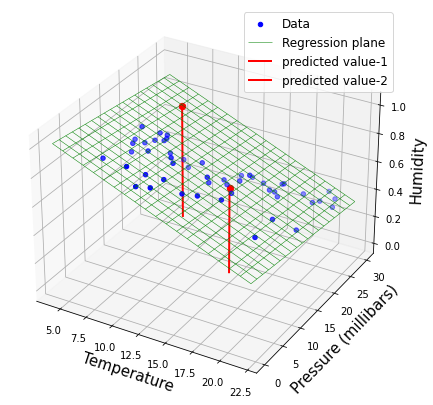

In [11]:
# Plot data points
boxsize = 18
fig     = plt.figure(figsize=(boxsize, 0.40*boxsize)) 

p1  = fig.add_subplot(111, projection = "3d")

f1 = wdf.temp
f2 = wdf.ws
y  = wdf.Humidity

p1.scatter(f1, f2, y, c = "blue", s = 20, marker = "o", label = "Data")
p1.set_xlabel("Temperature", fontsize=15)
p1.set_ylabel("Pressure (millibars)", fontsize=15)
p1.set_zlabel("Humidity", fontsize=15)



# Plot regression plane
# x and y axis (features)
x01 = np.linspace(4, 22, 20) # --> Start, End, No. of points from start to end
x02 = np.linspace(0, 30, 20) # --> Start, End, No. of points from start to end

# Regression model parameters
beta0        = reg_model.intercept_
beta1, beta2 = reg_model.coef_

# Hypothesis
def reg_plane(x1, x2):
    y  = reg_model.intercept_ + x1*beta1 + x2*beta2
    return y

# x, y, for plotting a plane
x1, x2 = np.meshgrid(x01, x02) # --> Make mashgrid for 3d plots
y      = reg_plane(x1, x2)     # --> Corresponding predicted y value (Hypothesis)

# Plot the Regression plane
p1.plot_wireframe(x1, x2, y, color ='green', linewidth = 0.5, label = "Regression plane")


# Visualize a prediction on this plot 
t2 = 7
w2 = 25
prediction2 = reg_model.predict([[t2, w2]])

x1_2 = t2
x2_2 = w2
line_pred2 = np.linspace(0, prediction2, 100)
p1.plot_wireframe(x1_2, x2_2, line_pred2, color ='r', linewidth = 2, label = "predicted value-1")
p1.scatter(x1_2, x2_2, prediction2, color ='r', s = 40)

# Visualize another prediction on this plot 
t3 = 15
w3 = 15
prediction3 = reg_model.predict([[t3, w3]])

x1_3 = t3
x2_3 = w3
line_pred3 = np.linspace(0, prediction3, 100)
p1.plot_wireframe(x1_3, x2_3, line_pred3, color ='r', linewidth = 2, label = "predicted value-2")
p1.scatter(x1_3, x2_3, prediction3, color ='r', s = 40)

plt.legend(fontsize=12)